In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [57]:
class NeuralNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.v_w = 0  # Momentum for weights
        self.v_b = 0  # Momentum for bias
    
    def forward(self, X):
        # Forward propagation
        Z = np.dot(X, self.weights) + self.bias
        return Z

    def mean_squared_error_loss(self, y_true, y_pred):
        # Mean squared error loss
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y_true, learning_rate=0.01, momentum=0.9, epochs=5000):
        # Training the network using stochastic gradient descent with momentum
        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward(X)
            
            # Compute loss
            loss = self.mean_squared_error_loss(y_true, predictions)
            
            # Backpropagation
            dZ = (predictions - y_true) / len(X)
            dW = np.dot(X.T, dZ)
            db = np.sum(dZ)
            
            # Update momentum
            self.v_w = momentum * self.v_w - learning_rate * dW
            self.v_b = momentum * self.v_b - learning_rate * db
            
            # Update weights and bias
            self.weights += self.v_w
            self.bias += self.v_b
            
            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def print_weights(self):
        print(f"Final weights:{self.weights}")

    def accuracy(self, X, y_true):
        predictions = self.forward(X)
        accuracy = np.mean(np.isclose(predictions, y_true, atol=1e-2))
        return accuracy

In [3]:
# Load data from Excel file
data = pd.read_excel("db.xlsx", usecols="B:G")
X = data.iloc[:, :-1].values / 100  # Normalize input data by dividing by 100
y = data.iloc[:, -1].values / 100   # Normalize output data by dividing by 100

In [5]:
X

array([[0.61, 1.  , 0.73, 0.96, 0.53],
       [0.91, 0.67, 0.57, 0.53, 0.83],
       [0.61, 0.87, 0.66, 0.54, 0.54],
       [0.95, 0.84, 0.77, 0.56, 0.69],
       [0.93, 0.81, 0.67, 0.81, 0.62],
       [0.63, 0.67, 0.59, 0.85, 0.79],
       [0.56, 0.7 , 0.75, 0.99, 0.73],
       [0.87, 0.76, 0.75, 0.74, 0.71],
       [0.5 , 0.9 , 0.61, 0.68, 0.71],
       [0.59, 0.91, 0.64, 0.89, 0.75],
       [0.94, 0.78, 0.69, 0.57, 0.82],
       [0.54, 0.99, 0.74, 0.96, 0.79],
       [0.75, 0.81, 0.73, 0.88, 0.81],
       [0.72, 0.9 , 0.79, 0.85, 0.55],
       [0.72, 0.95, 0.65, 0.63, 0.82],
       [0.68, 0.67, 0.74, 0.96, 0.87],
       [0.66, 1.  , 0.92, 0.89, 0.78],
       [0.64, 0.65, 0.7 , 1.  , 0.95],
       [0.65, 0.76, 0.86, 0.82, 0.64],
       [0.6 , 0.84, 0.79, 0.62, 0.68],
       [0.78, 0.55, 1.  , 0.84, 0.6 ],
       [0.87, 0.74, 0.81, 0.67, 0.61],
       [0.7 , 0.81, 0.74, 0.69, 0.95],
       [0.74, 0.54, 0.6 , 0.82, 0.73],
       [0.85, 0.55, 0.68, 0.59, 0.78],
       [0.52, 0.68, 0.97,

In [58]:
# Initialize and train the neural network
nn = NeuralNetwork(input_size=X.shape[1])
nn.train(X, y)

Epoch 0, Loss: 7.153029286968529
Epoch 100, Loss: 0.008415588238077247
Epoch 200, Loss: 0.005639051549308438
Epoch 300, Loss: 0.0038880890785876134
Epoch 400, Loss: 0.0027129826908681032
Epoch 500, Loss: 0.001919089530855416
Epoch 600, Loss: 0.0013786833464166585
Epoch 700, Loss: 0.0010076402915257007
Epoch 800, Loss: 0.0007503437292593104
Epoch 900, Loss: 0.0005698790854847879
Epoch 1000, Loss: 0.00044164417020517904
Epoch 1100, Loss: 0.00034917146743164483
Epoch 1200, Loss: 0.0002813874934629904
Epoch 1300, Loss: 0.00023080879311842162
Epoch 1400, Loss: 0.00019235040276488876
Epoch 1500, Loss: 0.00016253612740884708
Epoch 1600, Loss: 0.00013897330806510378
Epoch 1700, Loss: 0.00012000226861950287
Epoch 1800, Loss: 0.00010446151341372319
Epoch 1900, Loss: 9.152988295590855e-05
Epoch 2000, Loss: 8.062004689547397e-05
Epoch 2100, Loss: 7.130635737788954e-05
Epoch 2200, Loss: 6.327577695138987e-05
Epoch 2300, Loss: 5.629435425241252e-05
Epoch 2400, Loss: 5.0184211637338255e-05
Epoch 2500

In [59]:
# Print final weights
true_weights = np.array([0.4, 0.15, 0.15, 0.25, 0.05])

# Generate test data
X_test = np.random.rand(100, 5)
y_test = np.dot(X_test, true_weights)

# Calculate accuracy on test data
test_accuracy = nn.accuracy(X_test, y_test)
print("========================================")
nn.print_weights()
print(f"True weights:{true_weights}")
print(f"Test accuracy: {test_accuracy}")


Final weights:[0.39448096 0.14510074 0.14385957 0.24458967 0.04526633]
True weights:[0.4  0.15 0.15 0.25 0.05]
Test accuracy: 0.87


In [11]:
X.shape

(200, 5)

In [60]:
import tensorflow
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1,input_shape=(5,)))
model.summary()
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['MSE'])

history = model.fit(X, y, epochs = 2300)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2300
7/7 [==============================] - 1s 3ms/step - loss: 0.1083 - MSE: 0.1083
Epoch 2/2300
7/7 [==============================] - 0s 3ms/step - loss: 0.0919 - MSE: 0.0919
Epoch 3/2300
7/7 [==============================] - 0s 4ms/step - loss: 0.0787 - MSE: 0.0787
Epoch 4/2300
7/7 [==============================] - 0s 3ms/step - loss: 0.0668 - MSE: 0.0668
Epoch 5/2300
7/7 [==============================] - 0s 3ms/step - loss: 0.0580 - MSE: 0.0580
Epoch 6/2300
7/7 [==============================] - 0s 3ms/step - loss: 0.0515 - MSE

In [61]:
model.layers[0].weights

[<tf.Variable 'dense_23/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[0.40003467],
        [0.14986393],
        [0.14993575],
        [0.24990408],
        [0.0500279 ]], dtype=float32)>,
 <tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32, numpy=array([-2.6439593e-05], dtype=float32)>]

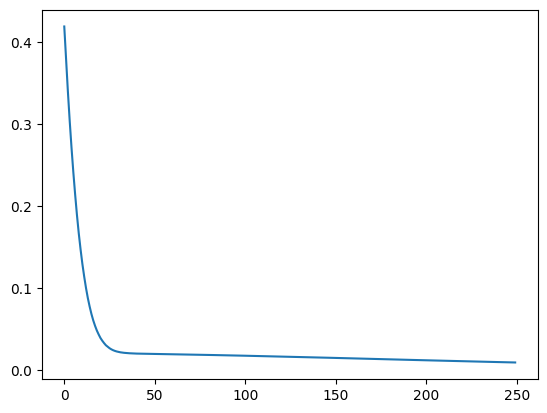

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['MSE'])